# Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path =  r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers'
df_anglers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'cleaned_categories_anglers_size_stocking_plankton_combined.csv'), index_col=False)

# Checking and cleaning imported dataframe

In [4]:
df_anglers.head()

,Unnamed: 0,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,0,Catch and Keep,yellow perch,Lake Huron,HU,lk_huron,1997-04-26 09:00:00,1997-04-26,9:00:00,1997,...,8.010978,Low,Average,Average,High,High,Average,Average,High,Average
1,1,Catch and Keep,rock bass,Lake Erie,ER,lk_erie,1997-09-02 14:00:00,1997-09-02,14:00:00,1997,...,266.657650,Low,High,Average,High,High,High,High,High,High
2,2,Catch and Keep,smallmouth bass,Lake Erie,ER,lk_erie,1997-07-11 13:30:00,1997-07-11,13:30:00,1997,...,266.657650,Low,High,Average,High,High,High,High,High,High
3,3,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-07-06 11:00:00,1997-07-06,11:00:00,1997,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
4,4,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-08-16 12:00:00,1997-08-16,12:00:00,1997,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average


In [5]:
#dropping unnamed column
df_anglers = df_anglers.drop('Unnamed: 0', axis=1)

In [6]:
df_anglers.head()

,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,weight lbs,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,Catch and Keep,yellow perch,Lake Huron,HU,lk_huron,1997-04-26 09:00:00,1997-04-26,9:00:00,1997,1.88,...,8.010978,Low,Average,Average,High,High,Average,Average,High,Average
1,Catch and Keep,rock bass,Lake Erie,ER,lk_erie,1997-09-02 14:00:00,1997-09-02,14:00:00,1997,1.00,...,266.657650,Low,High,Average,High,High,High,High,High,High
2,Catch and Keep,smallmouth bass,Lake Erie,ER,lk_erie,1997-07-11 13:30:00,1997-07-11,13:30:00,1997,5.56,...,266.657650,Low,High,Average,High,High,High,High,High,High
3,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-07-06 11:00:00,1997-07-06,11:00:00,1997,16.20,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
4,Catch and Keep,brown trout,Lake Huron,HU,lk_huron,1997-08-16 12:00:00,1997-08-16,12:00:00,1997,16.12,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average


In [7]:
df_anglers.shape

(6996, 32)

#all appears to have imported as expected

# Creating cluster by elbow method

In [8]:
#having column names
df_anglers.columns

Index(['category', 'species', 'waterbody', 'lake', 'merge', 'datetime',
       'date caught', 'time caught', 'year', 'weight lbs', 'length in',
       'method', 'bait', 'time hour caught', 'state minimum length in',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3', 'stocked_category', 'PRED_category',
       'CAL_category', 'CALIM_category', 'CALIM_category2', 'CYC_category',
       'CYCIM_category', 'DAP_category', 'NDAP_category'],
      dtype='object')

In [9]:
#creating a dataframe with just the variables that can be analyzed
df_numbers = df_anglers[['time hour caught','number_stocked','length in','weight lbs','number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3','Average of DAP_Num/m3', 'Average of NDAP_Num/m3', 'Average of PRED_Num/m3']]

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_numbers).score(df_numbers) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.765061288537133e+17,
 -7.551656154562995e+16,
 -3.3425753816950252e+16,
 -2.153657443786313e+16,
 -1.2609194055299714e+16,
 -8527271825194466.0,
 -5474792731097986.0,
 -2893609938986503.5,
 -2455824419933835.5]

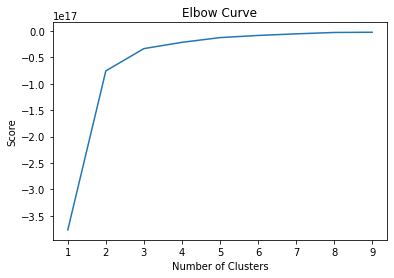

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#the curve takes a jump from 2 to 3, so 3 clusters is optimal

# Begin the k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_numbers)

KMeans(n_clusters=3)

In [15]:
# let's see the number of clusters
df_numbers['clusters'] = kmeans.fit_predict(df_numbers)

C:\Users\Selena\AppData\Local\Temp\ipykernel_10856\2988037419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers['clusters'] = kmeans.fit_predict(df_numbers)


In [16]:
df_numbers.head()

,time hour caught,number_stocked,length in,weight lbs,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3,clusters
0,9,79930.0,14.50,1.88,79930.0,1361.9520,4339.3447,612.4666,2576.4392,2191.5288,843.7557,8.010978,0
1,14,0.0,11.13,1.00,0.0,1332.8097,3149.1965,4084.1267,17017.6720,9012.2690,11139.4110,266.657650,0
2,13,131940.0,21.50,5.56,131940.0,1332.8097,3149.1965,4084.1267,17017.6720,9012.2690,11139.4110,266.657650,0
3,11,2020517.0,29.25,16.20,2020517.0,1361.9520,4339.3447,612.4666,2576.4392,2191.5288,843.7557,8.010978,0
4,12,2020517.0,31.00,16.12,2020517.0,1361.9520,4339.3447,612.4666,2576.4392,2191.5288,843.7557,8.010978,0


In [17]:
#seeing the number of value counts
df_numbers['clusters'].value_counts()

0    5132
2    1426
1     438
Name: clusters, dtype: int64

In [21]:
# setting the colors to the clusters
df_numbers.loc[df_numbers['clusters'] == 2, 'cluster'] = 'green'
df_numbers.loc[df_numbers['clusters'] == 1, 'cluster'] = 'purple'
df_numbers.loc[df_numbers['clusters'] == 0, 'cluster'] = 'pink'

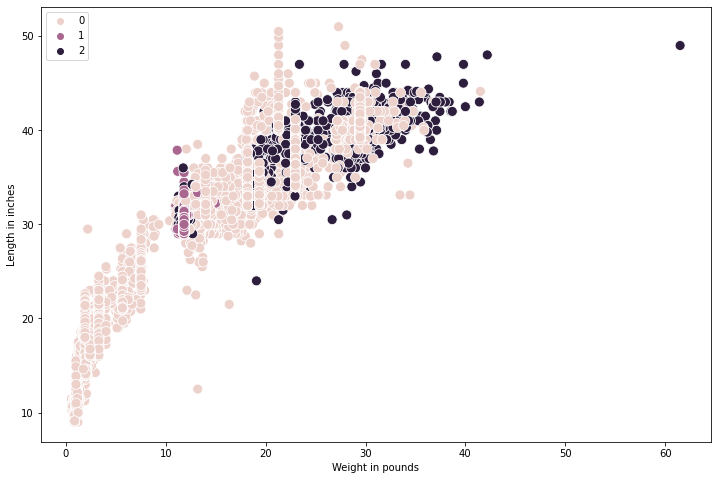

In [22]:
# Plot the clusters for the "Length" and "Weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numbers['weight lbs'], y=df_numbers['length in'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Weight in pounds') # Label x-axis.
plt.ylabel('Length in inches') # Label y-axis.
plt.show()

#there is kind of an overlap in the clusters. So shorter fish can be heavier fish. The clusters really aren't separated very well.

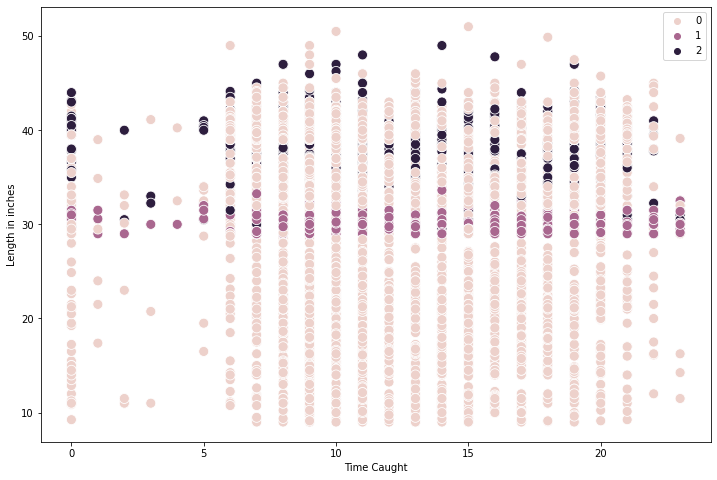

In [23]:
# Plot the clusters for the "Length" and "Time Caught" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numbers['time hour caught'], y=df_numbers['length in'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Time Caught') # Label x-axis.
plt.ylabel('Length in inches') # Label y-axis.
plt.show()

#longer fish are not caught at a specific time. These are all species of fish though

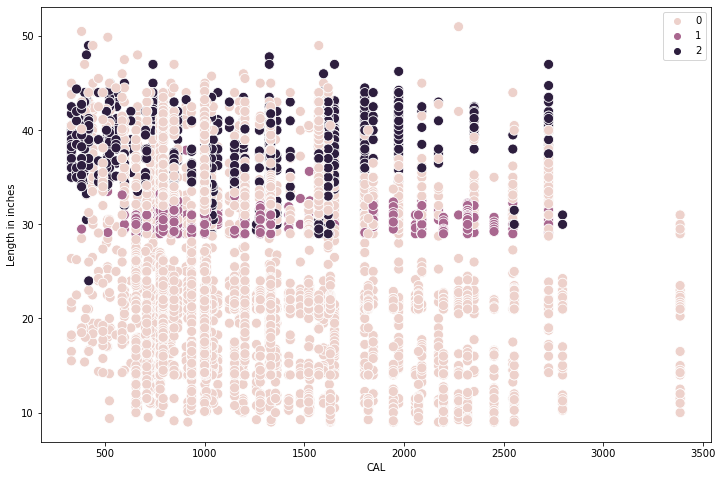

In [26]:
# Plot the clusters for the "Length" and "Average of CAL_Num/m3" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numbers['Average of CAL_Num/m3'], y=df_numbers['length in'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('CAL') # Label x-axis.
plt.ylabel('Length in inches') # Label y-axis.
plt.show()

#this clustering isn't helpful either

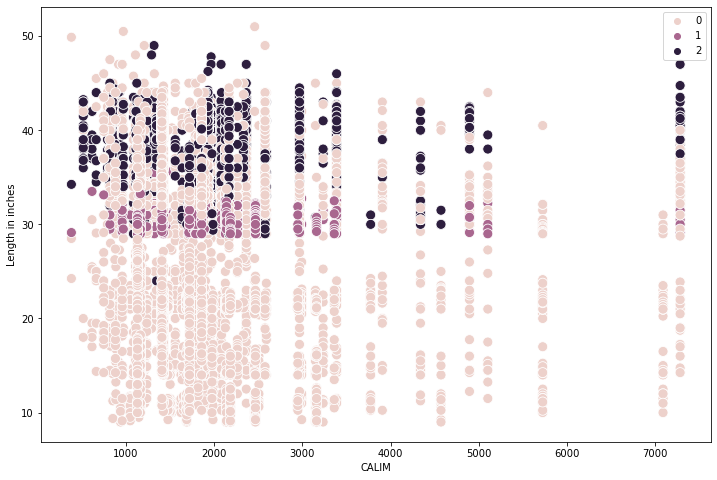

In [27]:
# Plot the clusters for the "Length" and "Average of CALIM_Num/m3" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numbers['Average of CALIM_Num/m3'], y=df_numbers['length in'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('CALIM') # Label x-axis.
plt.ylabel('Length in inches') # Label y-axis.
plt.show()

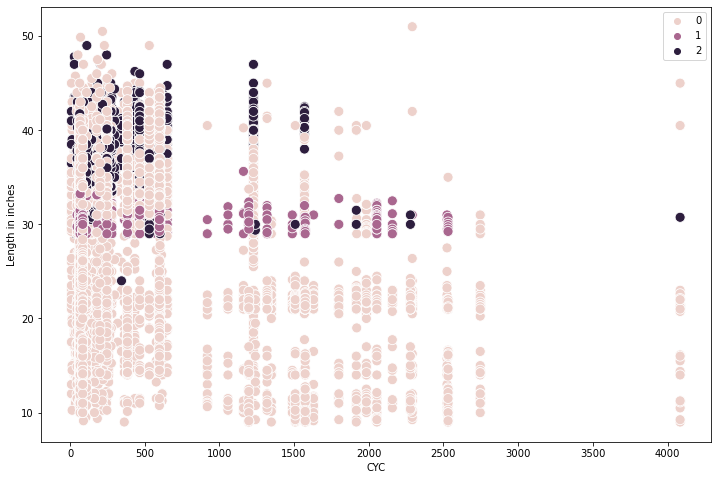

In [28]:
# Plot the clusters for the "Length" and "Average of CYC_Num/m3" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numbers['Average of CYC_Num/m3'], y=df_numbers['length in'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('CYC') # Label x-axis.
plt.ylabel('Length in inches') # Label y-axis.
plt.show()

#no helpful pattern here. I'm not sure why though. Maybe I need to focus on one species of fish.